In [1]:
import cvxopt
import pandas as pd
import numpy as np
from cvxopt import solvers, matrix
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, auc, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt  
import math
from scipy.spatial.distance import cdist
import time
from tqdm import tqdm
from sklearn.svm import SVC
from scipy.spatial.distance import pdist, squareform
import scipy
import joblib
from itertools import combinations
from joblib import Parallel, delayed
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [2]:
import multiprocessing 
print(multiprocessing.cpu_count())

8


In [3]:
gama = 0.05

In [4]:
train_path = "data/train.csv"
test_path = "data/test.csv"
val_path = "data/val.csv"

In [5]:
def readData(path, c1, c2):
	data = pd.read_csv(path, header=None)

	last_column = data.shape[1]-1
	data = filterData(c1, c2, data)

	# y_data = setY_1(data[last_column], c2, c1)
	x_data = scaleData(data.drop(last_column,1))
	y_data = data[last_column]

	return np.array(x_data), np.array(y_data).reshape(-1,1)


In [6]:
def readDataUnfiltered(path):
    data = pd.read_csv(path, header=None)

    last_column = data.shape[1]-1
    # data = filterData(c1, c2, data)

    x_data = scaleData(data.drop(last_column,1))
    y_data = data[last_column]


    return np.array(x_data), np.array(y_data).reshape(-1,1)

In [7]:
def filterData(c1, c2, data):
	last_column = data.shape[1]-1

	r_data = data[(data[last_column]==c1) | (data[last_column]==c2)]
	return r_data 

In [8]:
def scaleData(data):
    return data / 255

In [9]:

def calculateAccuracy(actual, predicted):
    count = 0
    for y1, y2 in zip(actual, predicted):
        if y1==y2:
            count+=1
    return count/len(predicted)

In [10]:
def plot_cm(actual, predicted,title="Confusion Matrix" ,labels=None):
    cm = confusion_matrix(actual, predicted, labels=labels)
    df_cm = pd.DataFrame(cm, columns=np.unique(actual), index = np.unique(actual))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (11,9))
    sns.set(font_scale=1.4)#for label size
    plt.title(title)

    ax = sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='d')# font size
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()

# Train Multi

In [22]:
sk_data_list = []

total_time = time.time()
for i in tqdm(range(0,9)):
    for j in tqdm(range(i+1, 10)):
        model_name = str(i)+"_"+str(j)
        
        clf_gauss = SVC(gamma=gama)
        
        train_x, train_y = readData(train_path, i, j)
        val_x, val_y = readData(val_path, i, j)
        test_x, test_y = readData(test_path, i, j)
        
        train_time = time.time()
        clf_gauss.fit(train_x, train_y.reshape(-1,))
        train_time = time.time() - train_time
        
        train_pred = clf_gauss.predict(train_x)
        val_pred = clf_gauss.predict(val_x)
        test_pred = clf_gauss.predict(test_x)
        
        a1 = calculateAccuracy(train_y, train_pred)
        a2 = calculateAccuracy(val_y, val_pred)
        a3 = calculateAccuracy(test_y, test_pred)
        
        
        model_data = {
            "name": model_name,
            "train_acc": a1,
            "val_acc": a2,
            "test_acc": a3,
            "train_time": train_time,
            "train_pred": train_pred,
            "val_pred": val_pred,
            "test_pred": test_pred,  
        }
        sk_data_list.append(model_data)
#         joblib.dump(clf_gauss, model_name)
        
        print("train_pred", a1)
        print("val_pred", a2)
        print("test_pred", a3)
        
        
print(f"Total time", time.time() - total_time)





  0%|          | 0/9 [00:00<?, ?it/s]




  0%|          | 0/9 [00:00<?, ?it/s]




 11%|█         | 1/9 [00:16<02:15, 16.97s/it]

train_pred 0.9984444444444445
val_pred 0.986
test_pred 0.989







 22%|██▏       | 2/9 [00:37<02:06, 18.00s/it]

train_pred 0.9928888888888889
val_pred 0.976
test_pred 0.967







 33%|███▎      | 3/9 [01:05<02:05, 20.92s/it]

train_pred 0.992
val_pred 0.96
test_pred 0.961







 44%|████▍     | 4/9 [01:27<01:46, 21.33s/it]

train_pred 0.9988888888888889
val_pred 0.988
test_pred 0.983







 56%|█████▌    | 5/9 [01:47<01:24, 21.02s/it]

train_pred 0.9997777777777778
val_pred 0.998
test_pred 0.999







 67%|██████▋   | 6/9 [02:23<01:16, 25.41s/it]

train_pred 0.9662222222222222
val_pred 0.866
test_pred 0.858







 78%|███████▊  | 7/9 [02:36<00:43, 21.79s/it]

train_pred 0.9997777777777778
val_pred 0.992
test_pred 0.999







 89%|████████▉ | 8/9 [02:56<00:21, 21.06s/it]

train_pred 0.9982222222222222
val_pred 0.986
test_pred 0.978







100%|██████████| 9/9 [03:12<00:00, 21.44s/it]




 11%|█         | 1/9 [03:12<25:43, 192.99s/it]




  0%|          | 0/8 [00:00<?, ?it/s]

train_pred 1.0
val_pred 1.0
test_pred 0.998







 12%|█▎        | 1/8 [00:17<02:04, 17.82s/it]

train_pred 0.9991111111111111
val_pred 0.99
test_pred 0.989







 25%|██▌       | 2/8 [00:34<01:45, 17.51s/it]

train_pred 0.9964444444444445
val_pred 0.976
test_pred 0.984







 38%|███▊      | 3/8 [00:49<01:23, 16.63s/it]

train_pred 1.0
val_pred 0.988
test_pred 0.989







 50%|█████     | 4/8 [01:04<01:05, 16.32s/it]

train_pred 1.0
val_pred 0.994
test_pred 1.0







 62%|██████▎   | 5/8 [01:25<00:52, 17.61s/it]

train_pred 0.9982222222222222
val_pred 0.986
test_pred 0.986







 75%|███████▌  | 6/8 [01:37<00:32, 16.07s/it]

train_pred 1.0
val_pred 1.0
test_pred 1.0







 88%|████████▊ | 7/8 [01:58<00:17, 17.42s/it]

train_pred 0.9997777777777778
val_pred 0.992
test_pred 0.997







100%|██████████| 8/8 [02:14<00:00, 16.76s/it]




 22%|██▏       | 2/9 [05:27<20:27, 175.33s/it]




  0%|          | 0/7 [00:00<?, ?it/s]

train_pred 1.0
val_pred 0.998
test_pred 1.0







 14%|█▍        | 1/7 [00:18<01:49, 18.20s/it]

train_pred 0.994
val_pred 0.982
test_pred 0.972







 29%|██▊       | 2/7 [00:49<01:51, 22.26s/it]

train_pred 0.9744444444444444
val_pred 0.892
test_pred 0.894







 43%|████▎     | 3/7 [01:07<01:23, 20.92s/it]

train_pred 1.0
val_pred 0.998
test_pred 0.997







 57%|█████▋    | 4/7 [01:41<01:14, 24.72s/it]

train_pred 0.9764444444444444
val_pred 0.894
test_pred 0.874







 71%|███████▏  | 5/7 [01:56<00:43, 21.75s/it]

train_pred 1.0
val_pred 0.992
test_pred 0.999







 86%|████████▌ | 6/7 [02:16<00:21, 21.41s/it]

train_pred 0.9995555555555555
val_pred 0.976
test_pred 0.986







100%|██████████| 7/7 [02:32<00:00, 21.76s/it]




 33%|███▎      | 3/9 [07:59<16:50, 168.42s/it]




  0%|          | 0/6 [00:00<?, ?it/s]

train_pred 1.0
val_pred 1.0
test_pred 0.999







 17%|█▋        | 1/6 [00:26<02:10, 26.09s/it]

train_pred 0.9902222222222222
val_pred 0.964
test_pred 0.965







 33%|███▎      | 2/6 [00:43<01:34, 23.55s/it]

train_pred 1.0
val_pred 0.998
test_pred 0.994







 50%|█████     | 3/6 [01:09<01:12, 24.07s/it]

train_pred 0.9884444444444445
val_pred 0.966
test_pred 0.947







 67%|██████▋   | 4/6 [01:23<00:42, 21.05s/it]

train_pred 1.0
val_pred 0.998
test_pred 0.999







 83%|████████▎ | 5/6 [01:42<00:20, 20.67s/it]

train_pred 0.9986666666666667
val_pred 0.994
test_pred 0.988







100%|██████████| 6/6 [01:58<00:00, 19.78s/it]




 44%|████▍     | 4/9 [09:58<12:47, 153.49s/it]




  0%|          | 0/5 [00:00<?, ?it/s]

train_pred 1.0
val_pred 1.0
test_pred 1.0







 20%|██        | 1/5 [00:18<01:13, 18.27s/it]

train_pred 1.0
val_pred 0.996
test_pred 0.996







 40%|████      | 2/5 [00:50<01:07, 22.58s/it]

train_pred 0.9762222222222222
val_pred 0.892
test_pred 0.89







 60%|██████    | 3/5 [01:04<00:39, 19.84s/it]

train_pred 1.0
val_pred 0.994
test_pred 0.999







 80%|████████  | 4/5 [01:26<00:20, 20.48s/it]

train_pred 0.9984444444444445
val_pred 0.984
test_pred 0.983







100%|██████████| 5/5 [01:42<00:00, 20.48s/it]




 56%|█████▌    | 5/9 [11:40<09:12, 138.17s/it]




  0%|          | 0/4 [00:00<?, ?it/s]

train_pred 1.0
val_pred 1.0
test_pred 0.999







 25%|██▌       | 1/4 [00:21<01:05, 21.74s/it]

train_pred 1.0
val_pred 0.996
test_pred 1.0







 50%|█████     | 2/4 [00:45<00:44, 22.44s/it]

train_pred 0.9964444444444445
val_pred 0.97
test_pred 0.968







 75%|███████▌  | 3/4 [01:10<00:23, 23.25s/it]

train_pred 0.9997777777777778
val_pred 0.994
test_pred 0.992







100%|██████████| 4/4 [01:32<00:00, 23.23s/it]




 67%|██████▋   | 6/9 [13:13<06:13, 124.60s/it]




  0%|          | 0/3 [00:00<?, ?it/s]

train_pred 0.9991111111111111
val_pred 0.976
test_pred 0.981







 33%|███▎      | 1/3 [00:14<00:29, 14.83s/it]

train_pred 1.0
val_pred 0.992
test_pred 0.999







 67%|██████▋   | 2/3 [00:39<00:17, 17.92s/it]

train_pred 0.9971111111111111
val_pred 0.99
test_pred 0.986







100%|██████████| 3/3 [00:58<00:00, 19.37s/it]




 78%|███████▊  | 7/9 [14:11<03:29, 104.66s/it]




  0%|          | 0/2 [00:00<?, ?it/s]

train_pred 1.0
val_pred 0.998
test_pred 0.999







 50%|█████     | 1/2 [00:17<00:17, 17.61s/it]

train_pred 1.0
val_pred 0.986
test_pred 0.995







100%|██████████| 2/2 [00:39<00:00, 19.69s/it]




 89%|████████▉ | 8/9 [14:50<01:25, 85.07s/it] 




  0%|          | 0/1 [00:00<?, ?it/s]

train_pred 0.9882222222222222
val_pred 0.958
test_pred 0.966







100%|██████████| 1/1 [00:22<00:00, 22.20s/it]




100%|██████████| 9/9 [15:13<00:00, 101.46s/it][A

train_pred 1.0
val_pred 0.992
test_pred 0.998
Total time 913.1469151973724


In [23]:
sk_data_list

[{'name': '0_1',
  'train_acc': 0.9984444444444445,
  'val_acc': 0.986,
  'test_acc': 0.989,
  'train_time': 4.254934072494507,
  'train_pred': array([1., 1., 0., ..., 0., 1., 1.]),
  'val_pred': array([0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
         0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
         1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
         0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
         1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
         0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
         0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
         0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
         0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
         1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
         1., 1., 1., 0., 1., 1., 1.,

In [24]:
joblib.dump(sk_data_list, "sk_data_list")

['sk_data_list']

In [58]:
test_x_f , test_y_f = readDataUnfiltered(test_path)

In [63]:
test_count = test_x_f.shape[0]

In [65]:
test = test_x_f

In [66]:
test_count = test.shape[0]


In [67]:
m_vote = np.zeros((test_count,10))


In [71]:
m_conf = np.zeros((test_count,10))

In [72]:
m_conf.shape

(5000, 10)

In [11]:
from tqdm import tqdm_notebook

# Predict Multi

In [166]:
def predictMulti(test):
    test_count = test.shape[0]
    m_vote = np.zeros((test_count,10))
    m_conf = np.zeros((test_count,10))

    for i in tqdm_notebook(range(0,9)):
        for j in (range(i+1, 10)):
            model_name = str(i)+"_"+str(j)
            model = joblib.load(model_name)
            for test_no, test_example in tqdm_notebook(enumerate(test), total=test_count):

               

                pred =  int(model.predict(test_example.reshape(1,-1))[0])
                conf = model.decision_function(test_example.reshape(1,-1))[0]

                m_vote[test_no][pred] = m_vote[test_no][pred] + 1
                m_conf[test_no][pred] = m_conf[test_no][pred] + abs(conf)
    
    p = np.argmax(m_vote, axis=1) 
    for test_no in range(test_count):
        n_vote = m_vote[test_no][p[test_no]]
        max_conf = m_conf[test_no][p[test_no]]

        for i in range(10):
            if n_vote == m_vote[test_no][i]:
                if(m_conf[test_no][i] > max_conf):
                    p[test_no] = i

    return p, m_vote, m_conf



In [167]:
test_x, test_y = readDataUnfiltered(test_path)
val_x, val_y = readDataUnfiltered(val_path)

In [168]:
t = time.time()
p_test, v,c = predictMulti(test_x)
print("time:", time.time()-t)



time: 673.2258729934692


In [173]:
acc_test = calculateAccuracy(test_y, p_test)

In [178]:
f1_score_test = f1_score(test_y, p_test, average="weighted")

In [180]:
print("Test Accuracy:", acc_test)
print("F1 Score:", f1_score_test)

Test Accuracy: 0.8808
F1 Score: 0.8798029243833515


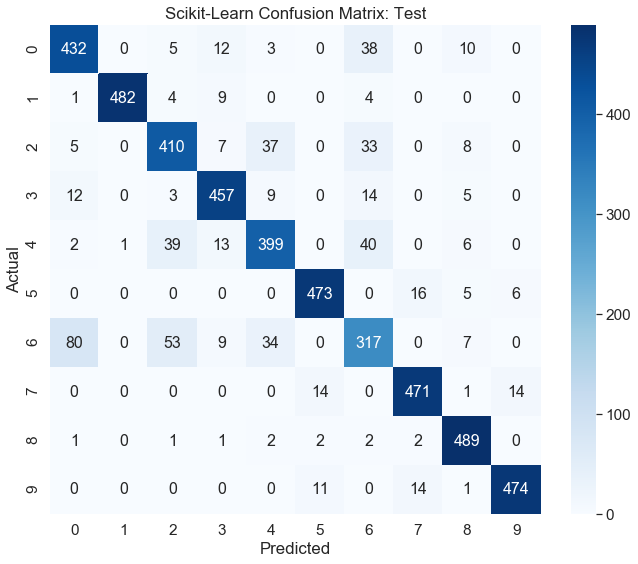

In [202]:
plot_cm(test_y.astype(int), p_test.astype(int), title="Scikit-Learn Confusion Matrix: Test")

In [203]:
t = time.time()
p_val, vv,cv = predictMulti(val_x)
print("time:", time.time()-t)



time: 324.92828607559204


In [204]:
acc_test = calculateAccuracy(val_y, p_val)
f1_score_test = f1_score(val_y, p_val, average="weighted")
print("val Accuracy:", acc_test)
print("F1 Score:", f1_score_test)

Test Accuracy: 0.8788
F1 Score: 0.8782948833370894


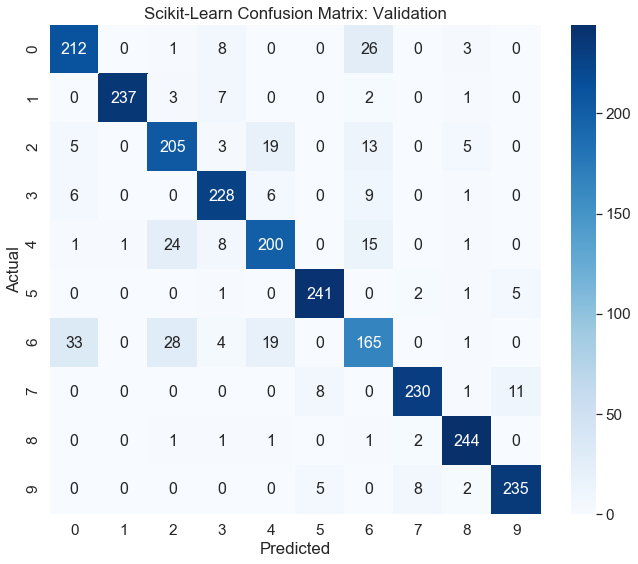

In [205]:
plot_cm(val_y.astype(int), p_val.astype(int), title="Scikit-Learn Confusion Matrix: Validation")

In [12]:
train_x, train_y = readDataUnfiltered(train_path)
test_x, test_y = readDataUnfiltered(test_path)
val_x, val_y = readDataUnfiltered(val_path)

In [13]:
# K Fold 

In [14]:
# grid search

In [7]:
C_set = [1e-5, 1e-3, 1, 5, 10]

In [21]:
# Test set

In [22]:
# train_x, train_y
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(train_x, train_y)

parameters = { 'C':C_set, 'gamma':[0.05]}
# for train_index, test_index in skf.split(train_x, train_y):
#     X_train, X_test = train_x[train_index], train_x[test_index]
#     y_train, y_test = train_y[train_index], train_y[test_index]
#     svc = svm.SVC()
#     clf = GridSearchCV(svc, parameters)
#     clf.fit(iris.data, iris.target)


    
    
    
    


# Grid Search for C

In [23]:
svc = svm.SVC()

In [32]:
clf = GridSearchCV(svc, parameters, cv=5, verbose=15, scoring='accuracy', n_jobs=-1, )

In [33]:
st = time.time()
clf.fit(train_x, train_y.reshape(-1))
print("Time taken:", time.time() - st)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done  12 out of  25 | elapsed: 36.9min remaining: 40.0min
[Parallel(n_jobs=-1)]: Done  14 out of  25 | elapsed: 37.7min remaining: 29.6min
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed: 46.1min remaining: 25.9min
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed: 46.2min

Time taken: 3340.544531583786


In [34]:
clf.best_params_

{'C': 5, 'gamma': 0.05}

In [36]:
samplesjoblib.dump(clf, "k_fold_clf")

['k_fold_clf']

In [14]:
clf = joblib.load("k_fold_clf")

In [54]:
# test acc

In [55]:
st = time.time()
pred_test = clf.predict(test_x)
print("Time taken:", time.time() - st)

Time taken: 41.442158460617065


In [63]:
pred_test_acc = calculateAccuracy(test_y, pred_test)
f1_test_score = f1_score(test_y, pred_test, average="weighted")
print("Accuracy on test data:",pred_test_acc)
print("F1 score on test data:", f1_test_score)

Accuracy on test data: 0.8828
F1 score on test data: 0.8820810950165507


In [ ]:
# val acc

In [66]:
st = time.time()
pred_val = clf.predict(val_x)
print("Time taken:", time.time() - st)

Time taken: 20.620283603668213


In [67]:
pred_val_acc = calculateAccuracy(val_y, pred_val)
f1_val_score = f1_score(val_y, pred_val, average="weighted")
print("Accuracy on val data:",pred_val_acc)
print("F1 score on val data:", f1_val_score)

Accuracy on test data: 0.8888
F1 score on test data: 0.8883933943278136


In [17]:
gama

0.05

# Plot of C vs Accuracy

In [15]:
test_acc_list = []
val_acc_list = []

In [18]:
C_set = [1e-5, 1e-3, 1, 5, 10]
model_list = []

In [ ]:
for c in tqdm(C_set):
    print(c)
    clf_gauss = SVC(gamma=gama, C=c)
    clf_gauss.fit(train_x, train_y.reshape(-1,))
    model_list.append(clf)
    
    
    pred_test_list = clf.predict(test_x)
    pred_val_list = clf.predic(val_x)
    
    test_acc = calculateAccuracy(test_y, pred_test_list)
    val_acc = calculateAccuracy(val_y, pred_val_list)
    
    test_acc_list.append(test_acc)
    val_acc_list.append(val_acc)

  0%|          | 0/5 [00:00<?, ?it/s]

1e-05


In [19]:
def pl_C(c):
    clf_gauss = SVC(gamma=gama, C=c)
    clf_gauss.fit(train_x, train_y.reshape(-1,))
    return clf_gauss

In [21]:
out = Parallel(n_jobs=-1)(delayed(pl_C)(c) for c in tqdm(C_set))

100%|██████████| 5/5 [00:00<00:00, 21.94it/s]


In [ ]:
# time taken = 14 vmin 

In [22]:
joblib.dump(out, "SVM_C_Model")

[SVC(C=1e-05, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=0.011, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
     de

In [23]:
joblib.dump(out, "SVM_C_Model")

['SVM_C_Model']

In [24]:
model_out = joblib.load("SVM_C_Model")

In [ ]:
test_acc_list = []
val_acc_list = []
for m in model_out:
    pred_test_list = m.predict(test_x)
    pred_val_list = m.predic(val_x)
    
    test_acc = calculateAccuracy(test_y, pred_test_list)
    val_acc = calculateAccuracy(val_y, pred_val_list)
    
    test_acc_list.append(test_acc)
    val_acc_list.append(val_acc)

In [29]:
def pl_predict(m):
    pred_test_list = m.predict(test_x)
    pred_val_list = m.predict(val_x)
    
    test_acc = calculateAccuracy(test_y, pred_test_list)
    val_acc = calculateAccuracy(val_y, pred_val_list)
    
    return test_acc, val_acc
    

In [30]:
out = Parallel(n_jobs=-1)(delayed(pl_predict)(m) for m in tqdm(model_out))


100%|██████████| 5/5 [00:00<00:00, 38.32it/s]


In [ ]:
# time take = 3 min 

In [71]:
out

[(0.5736, 0.552),
 (0.684, 0.6624),
 (0.8808, 0.8792),
 (0.8828, 0.8888),
 (0.8824, 0.888)]

# Result
for each 5 c's, train acuuracy and validation accuracy


[(0.5736, 0.552),
 (0.684, 0.6624),
 (0.8808, 0.8792),
 (0.8828, 0.8888),
 (0.8824, 0.888)]

In [72]:
joblib.dump(out, "SVM_C_ACC_TEST_VAL")

['SVM_C_ACC_TEST_VAL']

In [2]:
out = joblib.load("SVM_C_ACC_TEST_VAL")

In [3]:
a,b = zip(*out)

In [4]:
b

(0.552, 0.6624, 0.8792, 0.8888, 0.888)

In [8]:
C_set_log = np.log10(C_set)

In [9]:
C_set_log

array([-5.     , -3.     ,  0.     ,  0.69897,  1.     ])

In [10]:
test_acc_list = list(a)

In [11]:
val_acc_list = list(b)

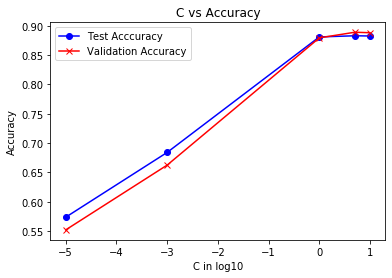

In [16]:
%matplotlib inline
plt.title("C vs Accuracy")
plt.xlabel("C in log10")
plt.ylabel("Accuracy")
plt.plot(C_set_log, test_acc_list, color="b", label="Test Acccuracy", marker="o")
plt.plot(C_set_log, val_acc_list, color="r", label="Validation Accuracy", marker="x")
plt.legend(loc="upper left")
